In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
df = pd.read_csv('./ArbolesDes/car_evaluation.csv', sep=',', engine='python')

df['precio_de_compra'].unique()
df['costo_de_mantenimiento'].unique()
df['numero_de_puertas'].unique()
df['numero_de_personas'].unique()
df['tamaño_cajuela'].unique()
df['seguridad'].unique()
df['decision'].unique()

array(['unacc', 'acc', 'vgood', 'good'], dtype=object)

In [3]:
df['precio_de_compra'].replace(['low', 'med', 'high', 'vhigh'], [0, 1, 2, 3], inplace=True)
df['costo_de_mantenimiento'].replace(['low', 'med', 'high', 'vhigh'], [0, 1, 2, 3], inplace=True)
df['tamaño_cajuela'].replace(['small', 'med', 'big'], [0, 1, 2], inplace=True)
df['seguridad'].replace(['low', 'med', 'high'], [0, 1, 2], inplace=True)
df['numero_de_personas'].replace(['2', '4', 'more'], [0, 1, 2], inplace=True)
df['numero_de_puertas'].replace(['2', '3', '4', '5more'], [0, 1, 2, 3], inplace=True)
df['decision'].replace(['unacc', 'acc', 'good', 'vgood'], [0, 1, 2, 3], inplace=True)

X = df.drop(['decision'],axis=1).values
y = df['decision'].values

X

array([[3, 3, 0, 0, 0, 0],
       [3, 3, 0, 0, 0, 1],
       [3, 3, 0, 0, 0, 2],
       ...,
       [0, 0, 3, 2, 2, 0],
       [0, 0, 3, 2, 2, 1],
       [0, 0, 3, 2, 2, 2]])

Separando los conjuntos de datos...
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       260
           1       0.93      0.95      0.94        59
           2       0.93      0.93      0.93        14
           3       0.92      0.92      0.92        13

    accuracy                           0.97       346
   macro avg       0.94      0.95      0.94       346
weighted avg       0.97      0.97      0.97       346



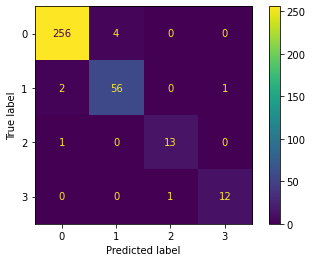

|--- feature_3 <= 0.50
|   |--- class: 0
|--- feature_3 >  0.50
|   |--- feature_5 <= 0.50
|   |   |--- class: 0
|   |--- feature_5 >  0.50
|   |   |--- feature_0 <= 1.50
|   |   |   |--- feature_1 <= 1.50
|   |   |   |   |--- feature_5 <= 1.50
|   |   |   |   |   |--- feature_4 <= 0.50
|   |   |   |   |   |   |--- feature_2 <= 0.50
|   |   |   |   |   |   |   |--- feature_3 <= 1.50
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- feature_3 >  1.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_2 >  0.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_4 >  0.50
|   |   |   |   |   |   |--- feature_0 <= 0.50
|   |   |   |   |   |   |   |--- feature_2 <= 0.50
|   |   |   |   |   |   |   |   |--- feature_4 <= 1.50
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- feature_4 >  1.50
|   |   |   |   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |   |   |--

In [4]:
#Separa el corpus cargado en el DataFrame en entrenamiento y el pruebas
print ('Separando los conjuntos de datos...')
X_train, X_test, y_train, y_test = \
train_test_split(X, y, test_size=0.2, shuffle = True, random_state=1)

#~ #Training
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)

#~ #Testing
y_pred = clf.predict(X_test)

#~ #Model evaluation
print (classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

text_representation = tree.export_text(clf)
print(text_representation)